# Customer Car Purchase Prediction by watching Advertisement on Social Media

Here we used Social_network_Ads dataset which providing information regarding the person's age and estimated salary & if he/she is interested in buying a car by watching an advertisement on Social Network.(yes=1,No=0)
we will predict that what are the chances of new person of some age to be interested in buying car by watching the same Social Media Advertisement.

In [96]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [97]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/DiogenesXXX/BDx/main/car_data.csv')

dataset.drop(dataset.columns[[0]], axis=1, inplace=True)

X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

In [98]:
dataset.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [99]:
dataset["Age"].value_counts()


38    48
40    46
42    44
36    44
41    42
35    38
39    37
49    33
37    32
48    32
43    30
27    29
47    28
28    25
50    24
45    23
26    22
29    22
31    22
46    22
30    21
32    20
60    19
51    19
33    18
44    17
52    17
59    16
34    15
25    15
53    15
24    15
20    14
58    14
55    13
61    13
54    12
19    12
57    12
21    11
56    11
23    11
22     9
63     7
62     6
18     5
Name: Age, dtype: int64

In [100]:
dataset["AnnualSalary"].value_counts()


81500     18
73500     17
76500     14
80500     12
62500     12
          ..
94500      1
139000     1
104500     1
117500     1
101000     1
Name: AnnualSalary, Length: 247, dtype: int64

In [101]:
dataset["Purchased"].value_counts()


0    598
1    402
Name: Purchased, dtype: int64

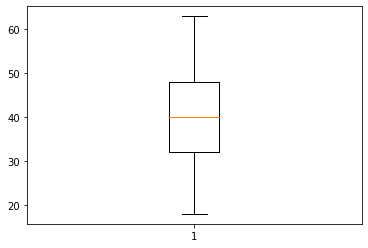

In [102]:
q = list(dataset.Age)
plt.boxplot(q)
plt.show()

In [103]:
dataset.groupby(['Age', 'Purchased']).mean()

,,AnnualSalary
Age,Purchased,
18,0,66400.000000
19,0,55125.000000
20,0,54607.142857
21,0,62409.090909
22,0,54888.888889
...,...,...
60,1,74000.000000
61,1,71576.923077
62,0,44500.000000


In [104]:
dataset.groupby(['Age', 'Purchased']).std()

,,AnnualSalary
Age,Purchased,
18,0,18297.540818
19,0,26849.856103
20,0,27434.662642
21,0,26118.784602
22,0,27481.559474
...,...,...
60,1,38009.456060
61,1,37597.565388
62,0,NaN


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [106]:
dataset.head(25)

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
5,Female,47,33500,1
6,Female,46,132500,1
7,Male,42,64000,0
8,Female,30,84500,0
9,Male,41,52000,0


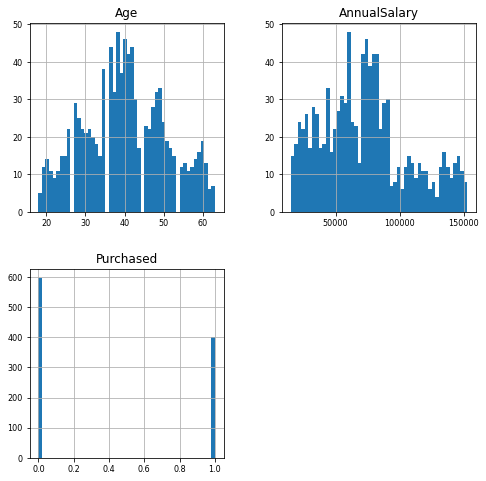

In [107]:
dataset.hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

## Splitting the Dataset and Feature Scaling

In [108]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [109]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


## 1)Logistic Regression

In [110]:
# fitting logistic regresion to the training set
from sklearn.linear_model import LogisticRegression
classi = LogisticRegression(random_state = 0)
classi.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [111]:

#predict the test set results
y_pred = classi.predict(X_test)


In [112]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [113]:
print(cm)    #confusion Matrix

[[138  14]
 [ 24  74]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


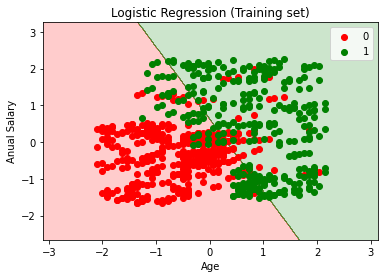

In [114]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


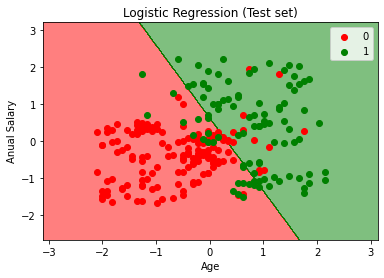

In [115]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.50,
                           cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

In [116]:
print(y_pred)            #Test Set result Prediction using Logistic Regression

[1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]


In [117]:
# Use score method to get accuracy of model
score = classi.score(X_test, y_test)
print("Accuracy using Logistic Regression: ",score)


Accuracy using Logistic Regression:  0.848


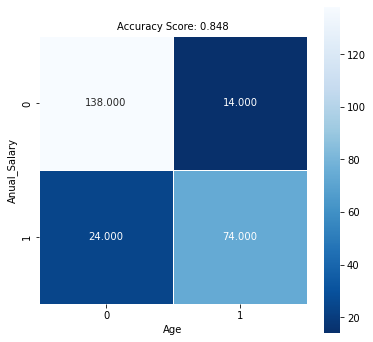

In [118]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Anual_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);


## 2) K_nearest neighbors[KNN]


In [119]:
# fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classi1 = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
classi1.fit(X_train, y_train)


KNeighborsClassifier()

In [120]:
#predict the test set results
y_pred1 = classi1.predict(X_test)


In [121]:
print(y_pred1)

[1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1]


In [122]:
# Use score method to get accuracy of model
score = classi1.score(X_test, y_test)
print("Accuracy using KNN: ",score)

Accuracy using KNN:  0.92


In [123]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[142  10]
 [ 10  88]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


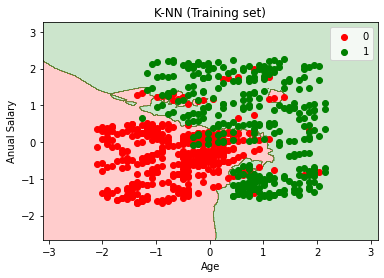

In [124]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi1.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


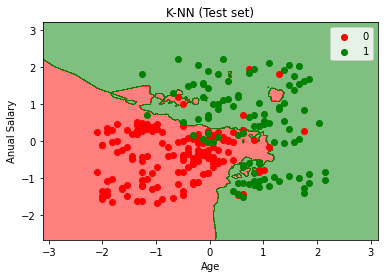

In [125]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi1.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.50,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

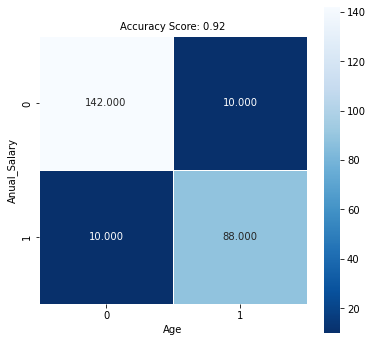

In [126]:
#heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Anual_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);


## 3) Decision tree classification

In [127]:
# fitting classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classi2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classi2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [128]:
#predict the test set results
y_pred2 = classi2.predict(X_test)

In [129]:
print(y_pred2)

[1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]


In [130]:
# Use score method to get accuracy of model
score = classi2.score(X_test, y_test)
print("Accuracy using Decision tree: ",score)

Accuracy using Decision tree:  0.88


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


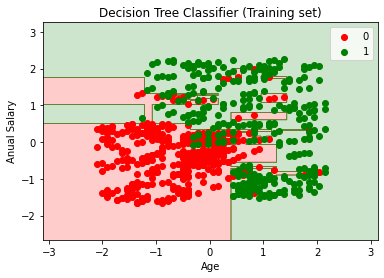

In [131]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred1 = classi2.predict(X1X2_array_t)
X1X2_pred_reshape1 = X1X2_pred1.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape1, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


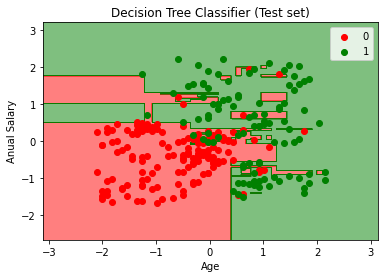

In [132]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred1 = classi2.predict(X1X2_array_t)
X1X2_pred_reshape1 = X1X2_pred1.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape1, alpha= 0.50,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

In [133]:
cm2 = confusion_matrix(y_test, y_pred2)

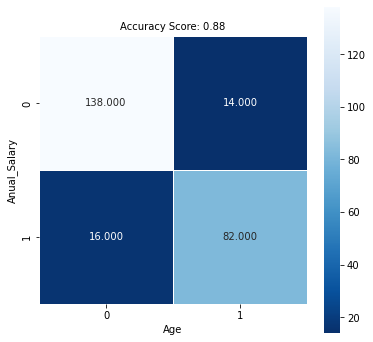

In [134]:
#heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Anual_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);


## 4) random forest classification

In [135]:
# fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classi3 = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 0)
classi3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [136]:
#predict the test set results
y_pred3 = classi3.predict(X_test)


In [137]:
print(y_pred3)

[1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0]


In [138]:
# Use score method to get accuracy of model
score = classi3.score(X_test, y_test)
print("Accuracy using Random Forest: ",score)

Accuracy using Random Forest:  0.896


In [139]:
cm3 = confusion_matrix(y_test, y_pred3)

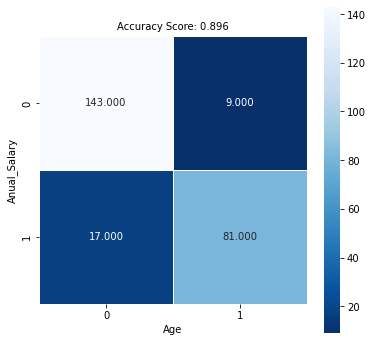

In [140]:
#heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Anual_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


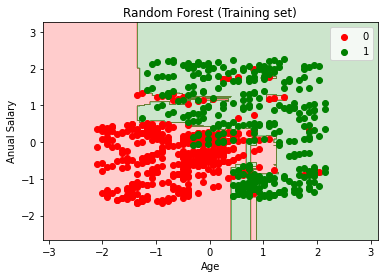

In [141]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred2 = classi3.predict(X1X2_array_t)
X1X2_pred_reshape2 = X1X2_pred2.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape2, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


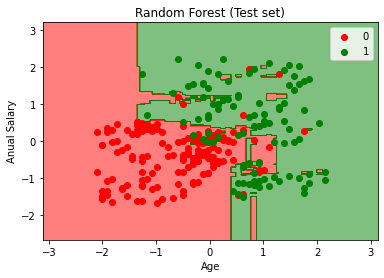

In [142]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred2 = classi3.predict(X1X2_array_t)
X1X2_pred_reshape2 = X1X2_pred2.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape2, alpha= 0.50,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

## 5) Support Vector Machine (SVM) classification

In [143]:
# fitting SVM to the training set
from sklearn.svm import SVC
classi4 = SVC(kernel='rbf', random_state = 0)
classi4.fit(X_train, y_train)


SVC(random_state=0)

In [144]:
#predict the test set results
y_pred4 = classi4.predict(X_test)

In [145]:
print(y_pred4)

[1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0]


In [146]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)


In [147]:
print(cm4)

[[138  14]
 [ 11  87]]


In [148]:
# Use score method to get accuracy of model
scoreee = classi4.score(X_test, y_test)
print("Accuracy using SVM : ",scoreee)

Accuracy using SVM :  0.9


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


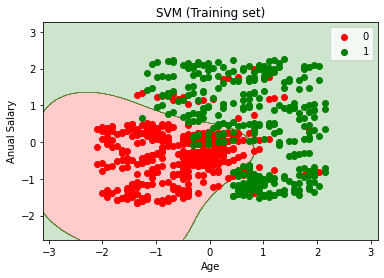

In [149]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred3 = classi4.predict(X1X2_array_t)
X1X2_pred_reshape3 = X1X2_pred3.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape3, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


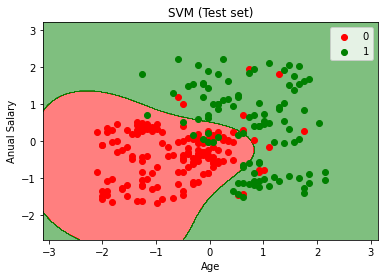

In [150]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred3 = classi4.predict(X1X2_array_t)
X1X2_pred_reshape3 = X1X2_pred3.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape3, alpha= 0.50,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

## 6) Naive bayes

In [151]:
# fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classi6 = GaussianNB()
classi6.fit(X_train, y_train)

GaussianNB()

In [152]:
#predict the test set results
y_pred6 = classi6.predict(X_test)

In [153]:
cm6 = confusion_matrix(y_test, y_pred6)

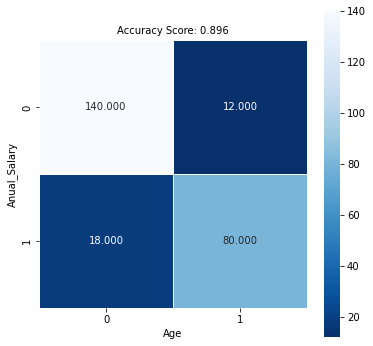

In [154]:
#heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Anual_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


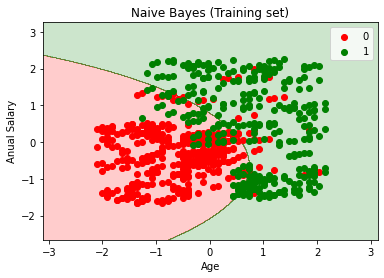

In [155]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred6 = classi6.predict(X1X2_array_t)
X1X2_pred_reshape6 = X1X2_pred6.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape6, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


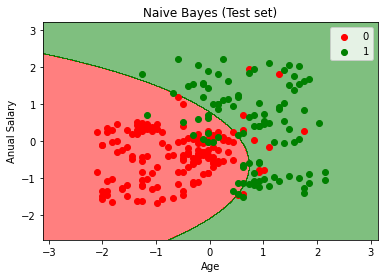

In [156]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred6 = classi6.predict(X1X2_array_t)
X1X2_pred_reshape6 = X1X2_pred6.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape6, alpha= 0.50,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

In [157]:
# Use score method to get accuracy of model
scoree = classi6.score(X_test, y_test)
print("Accuracy using Naive Bayes: ",scoree)

Accuracy using Naive Bayes:  0.88


### EMSEMBLE Voting Classifier for Better Results

In [158]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# importing voting classifier
from sklearn.ensemble import VotingClassifier

# loading train data set in dataframe from train_data.csv file
# df = pd.read_csv("https://raw.githubusercontent.com/DiogenesXXX/BDx/main/car_data.csv")

# getting target data from the dataframe
# target = df["Purchased"]

# getting train data from the dataframe
# train = df.drop("Purchased")

# train = dataset.iloc[:, [2, 3]].values
# target = dataset.iloc[:, 4].values

# Splitting between train data into training and validation dataset
# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20)

# initializing all the model objects with default parameters
# model_1 = LogisticRegression()
# model_2 = XGBClassifier()
# model_3 = RandomForestClassifier()

model_1 = LogisticRegression(random_state = 0)
model_2 = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
model_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_4 = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 0)
model_5 = SVC(kernel='rbf', random_state = 0)


estimator = []
estimator.append(('LogisticRegression', model_1))
estimator.append(('KNeighborsClassifier', model_2))
estimator.append(('DecisionTreeClassifier', model_3))
estimator.append(('RandomForestClassifier', model_4))
estimator.append(('SVC', model_5))


# Making the final model using voting classifier
# final_model = VotingClassifier(estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')
# final_model = VotingClassifier(estimators=[('lr', model_1), ('knc', model_2), ('dtc', model_3), ('rf', model_4), ('svc', model_5)], voting='hard')

# training all the model on the train dataset
# final_model.fit(X_train, y_train)

# predicting the output on the test dataset
# pred_final = final_model.predict(X_test)

# printing log loss between actual and predicted value
# print(log_loss(y_test, pred_final))

## Voting Classifier with hard voting

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred = VC_hard.predict(X_test)

# 5.1 Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       152
           1       0.88      0.87      0.87        98

    accuracy                           0.90       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250



In [160]:
# 5.2 Confusion matrix¶
cm = confusion_matrix(y_test, y_pred)

VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[140  12]
 [ 13  85]]


In [161]:
from statistics import stdev
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall')
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.86666667 0.8852459  0.86885246 0.95081967 0.8852459 ]
Average Cross Validation Recall score:  0.8913661202185791
Cross Validation Recall standard deviation:  0.03437501611790737


In [162]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Voting Classifier', 'Hard Voting')
VC_hard_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Hard Voting,0.867347,0.876289,0.871795,0.9,0.891366,0.034375


### Plotting decision regions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


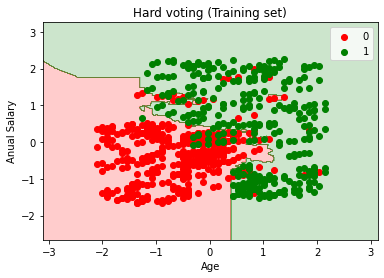

In [163]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred6 = VC_hard.predict(X1X2_array_t)
X1X2_pred_reshape6 = X1X2_pred6.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape6, alpha= 0.20,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Hard voting (Training set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


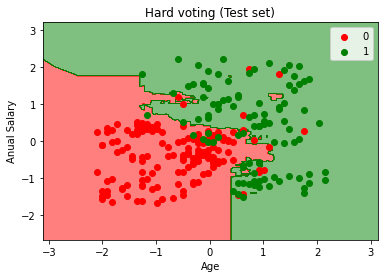

In [164]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred6 = VC_hard.predict(X1X2_array_t)
X1X2_pred_reshape6 = X1X2_pred6.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape6, alpha= 0.50,
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Hard voting (Test set)')
plt.xlabel('Age')
plt.ylabel('Anual Salary')
plt.legend()
plt.show()